*best viewed in [nbviewer](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/results/notebooks/4_head_pos.ipynb)*

# Time Adverbial Distribution and Collocations
## Head Parts of Speech Behavior
### Cody Kingham
<a href="../../../docs/sponsors.md"><img height=200px width=200px align="left" src="../../../docs/images/CambridgeU_BW.png"></a>

In [1]:
! echo "last updated:"; date

last updated:
Mon 23 Nov 2020 10:56:42 GMT


## Introduction

This notebook will produce data for my in-progress article on time adverbial components. 

<hr>

# Python

Now we import the modules and data needed for the analysis.

In [2]:
# see .py's for variables
from config import *
from get_hmod_sample import hm_df
from adjustText import adjust_text
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 150)

In [3]:
modis = [
    'plural', 'suffix', 'definite', 'demonstrative', 'cardinal', 
    'ordinal', 'genitive', 'preposition', 'qualitative', 'ø'
]

# Modeling Parts of Speech Behavior

In [4]:
# isolate Times
times = hm_df[hm_df.function == 'Time']

In [5]:
times.head_etcbc.value_counts()[:20]

JWM/     1353
<TH      356 
CNH/     261 
<WLM/    178 
<T/      155 
LJLH/    131 
>Z       126 
BQR=/    119 
<RB/     84  
XDC=/    69  
TMJD/    54  
KN       52  
MXR/     45  
>XR/     34  
NYX/     28  
MWT/     27  
MXRT/    26  
MTJ      25  
JWMM     21  
<D/      18  
Name: head_etcbc, dtype: int64

In [6]:
times['head'].value_counts()[:20]

יום     1353
עתה     356 
שׁנה    261 
עולם    178 
עת      155 
לילה    131 
אז      126 
בקר     119 
ערב     84  
חדשׁ    69  
תמיד    54  
כן      52  
מחר     45  
אחר     34  
נצח     28  
מות     27  
מחרת    26  
מתי     25  
יומם    21  
עד      18  
Name: head, dtype: int64

## Function by modifiers

In [7]:
funct_mod = pd.pivot_table(
    times,
    index='function',
    values=modis,
    aggfunc='sum',
    fill_value=0,
)

funct_mod.to_clipboard()

funct_mod

,cardinal,definite,demonstrative,genitive,ordinal,plural,preposition,qualitative,suffix,ø
function,,,,,,,,,,
Time,411,1331,493,426,162,569,1977,212,103,1148


## By head collocations

In [8]:
# compile head collocations dataframe
modis = [
    'plural', 'definite', 'cardinal', 'ordinal',
    'genitive', 'ø', 'demonstrative', 'suffix',
    'qualitative',
]
hcol_df = pd.pivot_table(
    times,
    index=['head_lexn', 'head','head_voc', 'head_pos'],
    values=modis,
    aggfunc=np.sum
)

# sort df by most common head lexs
hcol_df_most_common = hcol_df.sum(1).sort_values(ascending=False)
hcol_df = hcol_df.loc[hcol_df_most_common.index]

# prune dataset and keep samples where n >=5
hcol_df = hcol_df[hcol_df.sum(1) >= 5]

print('shape:', hcol_df.shape)
hcol_df.head(10)

shape: (41, 9)


,,,,cardinal,definite,demonstrative,genitive,ordinal,plural,qualitative,suffix,ø
head_lexn,head,head_voc,head_pos,,,,,,,,,
1437595,יום,יֹום,subs,165.0,819.0,383.0,279.0,108.0,384.0,171.0,41.0,9.0
1437627,שׁנה,שָׁנָה,subs,188.0,42.0,7.0,22.0,25.0,82.0,4.0,2.0,0.0
1437815,עתה,עַתָּה,advb,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,354.0
1438005,עת,עֵת,subs,0.0,80.0,65.0,48.0,0.0,6.0,11.0,10.0,4.0
1437819,עולם,עֹולָם,subs,0.0,3.0,0.0,1.0,0.0,5.0,0.0,0.0,170.0
1437596,לילה,לַיְלָה,subs,2.0,81.0,19.0,0.0,0.0,5.0,19.0,0.0,46.0
1437901,אז,אָז,advb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,125.0
1437970,חדשׁ,חֹדֶשׁ,subs,25.0,33.0,2.0,7.0,27.0,24.0,1.0,3.0,1.0
1437598,בקר,בֹּקֶר,subs,0.0,101.0,0.0,0.0,0.0,3.0,0.0,0.0,18.0


In [9]:
hcol_df.iloc[:3, :].astype(int).to_clipboard()
hcol_df.iloc[:3, :]

,,,,cardinal,definite,demonstrative,genitive,ordinal,plural,qualitative,suffix,ø
head_lexn,head,head_voc,head_pos,,,,,,,,,
1437595,יום,יֹום,subs,165.0,819.0,383.0,279.0,108.0,384.0,171.0,41.0,9.0
1437627,שׁנה,שָׁנָה,subs,188.0,42.0,7.0,22.0,25.0,82.0,4.0,2.0,0.0
1437815,עתה,עַתָּה,advb,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,354.0


In [10]:
hcol_df.shape

(41, 9)

In [11]:
# normalization: ratio
# we want to measure the behavior of items without regard
# for contingency data; in other words, the goal here is to 
# measure the relative similarity and dissimilarity of words 
# not necessarily to determine the pattern which is most distinctive
# of a single given lexeme

hcol_df_prop = hcol_df.div(hcol_df.sum(1), 0)

hcol_df_prop.head()

,,,,cardinal,definite,demonstrative,genitive,ordinal,plural,qualitative,suffix,ø
head_lexn,head,head_voc,head_pos,,,,,,,,,
1437595,יום,יֹום,subs,0.069945,0.347181,0.162357,0.118270,0.045782,0.162781,0.072488,0.017380,0.003815
1437627,שׁנה,שָׁנָה,subs,0.505376,0.112903,0.018817,0.059140,0.067204,0.220430,0.010753,0.005376,0.000000
1437815,עתה,עַתָּה,advb,0.000000,0.000000,0.005618,0.000000,0.000000,0.000000,0.000000,0.000000,0.994382
1438005,עת,עֵת,subs,0.000000,0.357143,0.290179,0.214286,0.000000,0.026786,0.049107,0.044643,0.017857
1437819,עולם,עֹולָם,subs,0.000000,0.016760,0.000000,0.005587,0.000000,0.027933,0.000000,0.000000,0.949721


In [12]:
hcol_df_prop.iloc[:3, :].round(2).to_clipboard()
hcol_df_prop.iloc[:3, :]

,,,,cardinal,definite,demonstrative,genitive,ordinal,plural,qualitative,suffix,ø
head_lexn,head,head_voc,head_pos,,,,,,,,,
1437595,יום,יֹום,subs,0.069945,0.347181,0.162357,0.11827,0.045782,0.162781,0.072488,0.017380,0.003815
1437627,שׁנה,שָׁנָה,subs,0.505376,0.112903,0.018817,0.05914,0.067204,0.220430,0.010753,0.005376,0.000000
1437815,עתה,עַתָּה,advb,0.000000,0.000000,0.005618,0.00000,0.000000,0.000000,0.000000,0.000000,0.994382


In [13]:
# really good example of a possible construal of 
# a typical particle into a noun-role
times[(times.head_etcbc == '<TH') & times.demonstrative]

,function,ref,book,ph_type,head,text,token,clause,sentence,classi,...,ord_str,cl_kind,verb,tense,verb_lex,book_sbl,lang,genre,nom_marks,has_nom
node,,,,,,,,,,,,,,,,,,,,,
761144,Time,1 Kgs 17:24,1_Kings,demon_ph,עתה,עַתָּה֙ זֶ֣ה,עתה.זה,עַתָּה֙ זֶ֣ה יָדַ֔עְתִּי,עַתָּה֙ זֶ֣ה יָדַ֔עְתִּי כִּ֛י אִ֥ישׁ אֱלֹהִ֖ים אָ֑תָּה וּדְבַר־יְהוָ֥ה בְּפִ֖יךָ אֱמֶֽת׃ פ,single.demonstrative,...,NaN,VC,True,qtl,ידע,1 Kgs,Hebrew,prose,1,True
766274,Time,2 Kgs 5:22,2_Kings,demon_ph,עתה,עַתָּ֡ה זֶ֠ה,עתה.זה,הִנֵּ֣ה עַתָּ֡ה זֶ֠ה בָּ֣אוּ אֵלַ֧י שְׁנֵֽי־נְעָרִ֛ים מֵהַ֥ר אֶפְרַ֖יִם מִבְּנֵ֣י הַנְּבִיאִ֑ים,הִנֵּ֣ה עַתָּ֡ה זֶ֠ה בָּ֣אוּ אֵלַ֧י שְׁנֵֽי־נְעָרִ֛ים מֵהַ֥ר אֶפְרַ֖יִם מִבְּנֵ֣י הַנְּבִיאִ֑ים,single.demonstrative,...,NaN,VC,True,qtl,בוא,2 Kgs,Hebrew,prose,1,True


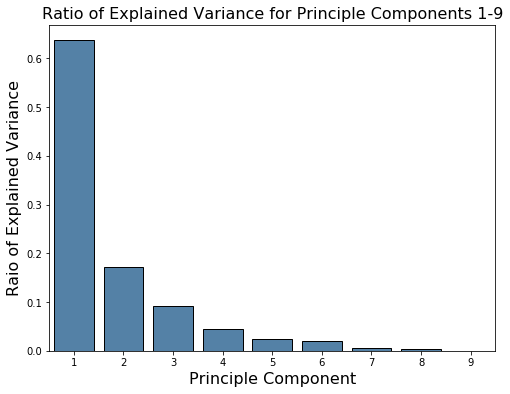

[6.37293919e-01 1.72212814e-01 9.24533305e-02 4.48473673e-02
 2.38617407e-02 2.05699571e-02 5.66507628e-03 3.09579439e-03
 1.68633508e-33]


In [14]:
# implement PCA plot
pca_comps, loadings = my_pca.apply_pca(hcol_df_prop, 0, 1)

In [15]:
loadings

,cardinal,definite,demonstrative,genitive,ordinal,plural,qualitative,suffix,ø
1,4.516436e-02,1.746867e-01,2.892299e-02,7.566979e-02,1.054732e-02,8.428042e-02,5.592341e-03,5.110542e-02,-4.759693e-01
2,-4.803480e-03,2.134437e-01,1.641155e-02,-4.790023e-02,2.642857e-03,-1.332864e-01,-1.323067e-03,-8.388295e-02,3.869801e-02
3,-2.389493e-02,-2.322188e-02,-1.025490e-02,1.598993e-01,-5.677374e-03,-1.117154e-01,-6.703829e-03,2.487655e-02,-3.307513e-03
4,1.179809e-01,-3.398508e-02,-1.050386e-02,3.065440e-04,1.025132e-02,-2.966633e-02,1.214386e-02,-5.398083e-02,-1.254657e-02
5,-2.584948e-02,-4.590733e-03,3.302949e-02,3.437418e-02,2.678475e-03,3.490919e-02,2.481512e-03,-7.823642e-02,1.203791e-03
6,-8.498059e-03,-2.652300e-02,7.551601e-02,-2.529833e-02,1.291855e-02,-3.435855e-02,1.043246e-02,1.034859e-02,-1.453766e-02
7,-8.580243e-03,-2.972700e-03,-9.884314e-03,-3.224725e-03,-1.001790e-02,-4.144433e-03,4.599256e-02,-3.372207e-03,-3.796041e-03
8,-7.848918e-03,-3.355497e-03,-1.079209e-02,-3.031808e-03,3.316332e-02,-3.466493e-03,2.166135e-03,-3.492136e-03,-3.342515e-03
9,-9.000340e-18,-9.000340e-18,-9.000340e-18,-9.000340e-18,-9.000340e-18,-9.000340e-18,-9.000340e-18,-9.000340e-18,-9.000340e-18


In [16]:
# copy table for the article
loadings.loc[[1, 2]].round(2).to_clipboard()

In [17]:
pca_comps.head()

,,,,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
head_lexn,head,head_voc,head_pos,,,,,,,,,
1437595,יום,יֹום,subs,0.486032,0.053467,-0.042813,0.015354,0.089755,0.102405,0.038150,0.014411,-1.500882e-17
1437627,שׁנה,שָׁנָה,subs,0.440417,-0.160218,-0.139755,0.441079,-0.049093,0.004349,-0.056177,0.001519,-5.229864e-17
1437815,עתה,עַתָּה,advb,-0.588959,0.019705,-0.004540,-0.005139,-0.001547,0.002973,-0.009121,-0.001914,-5.271445e-17
1438005,עת,עֵת,subs,0.471130,0.113035,0.115861,-0.044042,0.111814,0.224024,0.013885,-0.051044,6.929722e-17
1437819,עולם,עֹולָם,subs,-0.537903,0.011518,-0.016600,-0.010721,0.006830,-0.011030,-0.008283,-0.000823,-3.751634e-17


In [18]:
pca_comps.loc[pd.IndexSlice[:, :, :, 'advb'], :]

,,,,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
head_lexn,head,head_voc,head_pos,,,,,,,,,
1437815,עתה,עַתָּה,advb,-0.588959,0.019705,-0.004540,-0.005139,-0.001547,0.002973,-0.009121,-0.001914,-5.271445e-17
1437901,אז,אָז,advb,-0.586022,0.017645,0.002134,-0.004489,-0.000716,-0.003297,-0.008339,-0.000703,-6.213792e-17
1437606,כן,כֵּן,advb,-0.594363,0.020164,-0.004345,-0.005222,-0.003308,-0.002392,-0.008430,-0.000770,-5.229864e-17
1439584,יומם,יֹומָם,advb,-0.594363,0.020164,-0.004345,-0.005222,-0.003308,-0.002392,-0.008430,-0.000770,-5.229864e-17
1438340,הנה,הֵנָּה,advb,-0.594363,0.020164,-0.004345,-0.005222,-0.003308,-0.002392,-0.008430,-0.000770,-5.229864e-17


In [19]:
# export PCA values to spreadsheet
pca_comps.to_csv('../../spreadsheets/advb_article/pos_PCA.csv')

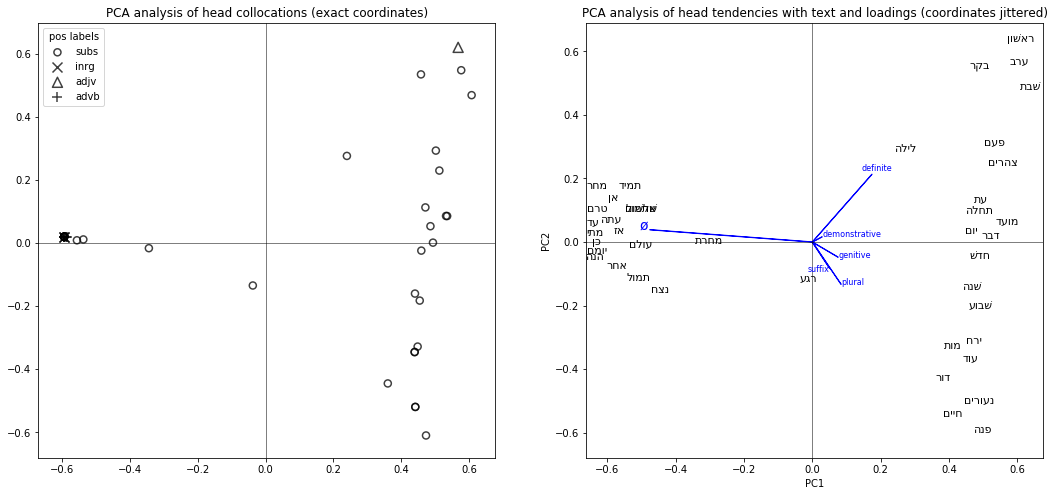

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

ax1, ax2 = axs

# -- SUBPLOT SHAPES --

# config mapping of plotted points
# https://matplotlib.org/api/markers_api.html#module-matplotlib.markers
sp2settings = {
    'subs': {'marker': 'o', 's': 50},
    'inrg': {'marker': 'x', 'color': 'black', 's': 100},
    'adjv': {'marker': '^', 'color': '', 's': 100},
    'advb': {'marker': '+', 'color':'black', 's': 100}
}

for sp, settings in sp2settings.items():
    pca_subset = pca_comps.loc[pd.IndexSlice[:, :, :, sp], :]
    
    # config settings
    plot_settings = {
        'linewidths':1.5, 'alpha':0.75, 
        'color': '', 's':50, 'edgecolor': 'black',
        'label': sp,
    }
    plot_settings.update(settings)
    
    ax1.scatter(
        pca_subset['PC1'], 
        pca_subset['PC2'], 
        **plot_settings
    )

ax1.axhline(0, color='black', linewidth=0.5)
ax1.axvline(0, color='black', linewidth=0.5)
ax1.set_title('PCA analysis of head collocations (exact coordinates)')
ax1.legend(title='pos labels')

# -- SUBPLOT TEXT --

# plot with invisible points to set up axes properly
ax2.scatter(
    pca_comps['PC1'], 
    pca_comps['PC2'], 
    color='',
)

# annotate with texts
for lexn, lex, voc_lex, pos in pca_comps.index:
    x, y = pca_comps.loc[lexn][['PC1', 'PC2']].values[0]
    plt_lex = get_display(lex)
    ax2.text(x, y, plt_lex, size=11)
    
adjust_text(ax2.texts, autoalign='xy')
    
# annotate loadings
offsets = {
    'ø': (-0.03, 0, 14),
    'definite': (-0.03, 0.011, 8),
    'suffix': (-0.066, -0.01, 8),
}


skip_feat = ['qualitative', 'ordinal', 'cardinal']
for feature in loadings:
    if feature in skip_feat:
        continue
    x_off, y_off, size = offsets.get(feature, (0,0, 8)) # config offsets / size
    fx, fy = loadings[feature][:2]
    ax2.arrow(0, 0, fx, fy, color='blue', linewidth=1, head_width=0)
    ax2.text(fx+x_off, fy+y_off, feature, color='blue', size=size) 

    
ax2.axhline(0, color='black', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=0.5)
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('PCA analysis of head tendencies with text and loadings (coordinates jittered)')

savefig('PCA_pos_shapes_text')

plt.show()

In [21]:
# loading score examples

'; '.join(
    get_spread(times[
        (times.head_etcbc == 'JWM/')
        & (times.definite)
        & (times.demonstrative)
]['ref'], 10)
)

'Gen 7:11; Deut 3:14; Josh 20:6; 1 Sam 7:6; 2 Sam 3:38; 2 Kgs 20:1; Isa 28:5; Ezek 39:11; Zech 13:4; 2 Chr 35:16'

In [22]:
times[
     (times.genitive)
    & (times.head_etcbc.isin({'N<WRJM/', 'XJJM/', 'MWT/'}))
][['ref', 'text', 'sentence']]

,ref,text,sentence
node,,,
658967,Gen 25:11,אַחֲרֵי֙ מֹ֣ות אַבְרָהָ֔ם,וַיְהִ֗י אַחֲרֵי֙ מֹ֣ות אַבְרָהָ֔ם
659438,Gen 26:18,אַחֲרֵ֖י מֹ֣ות אַבְרָהָ֑ם,וַיַּחְפֹּ֣ר׀ אֶת־בְּאֵרֹ֣ת הַמַּ֗יִם אֲשֶׁ֤ר חָֽפְרוּ֙ בִּימֵי֙ אַבְרָהָ֣ם אָבִ֔יו וַיְסַתְּמ֣וּם פְּלִשְׁתִּ֔ים אַחֲרֵ֖י מֹ֣ות אַבְרָהָ֑ם
687936,Lev 16:1,אַחֲרֵ֣י מֹ֔ות שְׁנֵ֖י בְּנֵ֣י אַהֲרֹ֑ן,וַיְדַבֵּ֤ר יְהוָה֙ אֶל־מֹשֶׁ֔ה אַחֲרֵ֣י מֹ֔ות שְׁנֵ֖י בְּנֵ֣י אַהֲרֹ֑ן בְּקָרְבָתָ֥ם לִפְנֵי־יְהוָ֖ה וַיָּמֻֽתוּ׃
703941,Num 35:25,עַד־מֹות֙ הַכֹּהֵ֣ן הַגָּדֹ֔ל,וְיָ֣שַׁב בָּ֗הּ עַד־מֹות֙ הַכֹּהֵ֣ן הַגָּדֹ֔ל אֲשֶׁר־מָשַׁ֥ח אֹתֹ֖ו בְּשֶׁ֥מֶן הַקֹּֽדֶשׁ׃
703970,Num 35:28,עַד־מֹ֖ות הַכֹּהֵ֣ן הַגָּדֹ֑ל,כִּ֣י בְעִ֤יר מִקְלָטֹו֙ יֵשֵׁ֔ב עַד־מֹ֖ות הַכֹּהֵ֣ן הַגָּדֹ֑ל
703972,Num 35:28,אַחֲרֵ֥י מֹות֙ הַכֹּהֵ֣ן הַגָּדֹ֔ל,וְאַחֲרֵ֥י מֹות֙ הַכֹּהֵ֣ן הַגָּדֹ֔ל יָשׁוּב֙ הָרֹצֵ֔חַ אֶל־אֶ֖רֶץ אֲחֻזָּתֹֽו׃
704014,Num 35:32,עַד־מֹ֖ות הַכֹּהֵֽן׃,וְלֹא־תִקְח֣וּ כֹ֔פֶר לָנ֖וּס אֶל־עִ֣יר מִקְלָטֹ֑ו לָשׁוּב֙ לָשֶׁ֣בֶת בָּאָ֔רֶץ עַד־מֹ֖ות הַכֹּהֵֽן׃
721426,Josh 20:6,עַד־מֹות֙ הַכֹּהֵ֣ן הַגָּדֹ֔ול,וְיָשַׁ֣ב׀ בָּעִ֣יר הַהִ֗יא עַד־עָמְדֹ֞ו לִפְנֵ֤י הָֽעֵדָה֙ לַמִּשְׁפָּ֔ט עַד־מֹות֙ הַכֹּהֵ֣ן הַגָּדֹ֔ול אֲשֶׁ֥ר יִהְיֶ֖ה בַּיָּמִ֣ים הָהֵ֑ם
722914,Judg 1:1,אַחֲרֵי֙ מֹ֣ות יְהֹושֻׁ֔עַ,וַיְהִ֗י אַחֲרֵי֙ מֹ֣ות יְהֹושֻׁ֔עַ


In [23]:
lifecycles = times[
    (times.plural)
    & (times.suffix)
    & (times.head_etcbc.isin({'N<WRJM/', 'XJJM/', 'MWT/', 'DWR/'}))
][['ref', 'text', 'sentence']]

lifecycles

,ref,text,sentence
node,,,
673284,Exod 12:14,לְדֹרֹ֣תֵיכֶ֔ם,וְחַגֹּתֶ֥ם אֹתֹ֖ו חַ֣ג לַֽיהוָ֑ה לְדֹרֹ֣תֵיכֶ֔ם
673335,Exod 12:17,לְדֹרֹתֵיכֶ֖ם,וּשְׁמַרְתֶּ֞ם אֶת־הַיֹּ֥ום הַזֶּ֛ה לְדֹרֹתֵיכֶ֖ם חֻקַּ֥ת עֹולָֽם׃
673631,Exod 12:42,לְדֹרֹתָֽם׃ פ,הֽוּא־הַלַּ֤יְלָה הַזֶּה֙ לַֽיהוָ֔ה שִׁמֻּרִ֛ים לְכָל־בְּנֵ֥י יִשְׂרָאֵ֖ל לְדֹרֹתָֽם׃ פ
682541,Exod 40:15,לְדֹרֹתָֽם׃,וְ֠הָיְתָה לִהְיֹ֨ת לָהֶ֧ם מָשְׁחָתָ֛ם לִכְהֻנַּ֥ת עֹולָ֖ם לְדֹרֹתָֽם׃
688703,Lev 18:18,בְּחַיֶּֽיהָ׃,וְאִשָּׁ֥ה אֶל־אֲחֹתָ֖הּ לֹ֣א תִקָּ֑ח לִצְרֹ֗ר לְגַלֹּ֧ות עֶרְוָתָ֛הּ עָלֶ֖יהָ בְּחַיֶּֽיהָ׃
729481,Judg 16:30,בְּחַיָּֽיו׃,וַיִּהְי֤וּ הַמֵּתִים֙ אֲשֶׁ֣ר הֵמִ֣ית בְּמֹותֹ֔ו רַבִּ֕ים מֵאֲשֶׁ֥ר הֵמִ֖ית בְּחַיָּֽיו׃
737983,1 Sam 17:33,מִנְּעֻרָֽיו׃ ס,וְה֛וּא אִ֥ישׁ מִלְחָמָ֖ה מִנְּעֻרָֽיו׃ ס
750638,2 Sam 18:18,בְחַיָּיו֙,וַיַּצֶּב־לֹ֤ו בְחַיָּיו֙ אֶת־מַצֶּ֨בֶת֙ אֲשֶׁ֣ר בְּעֵֽמֶק־הַמֶּ֔לֶךְ
761328,1 Kgs 18:12,מִנְּעֻרָֽי׃,וְעַבְדְּךָ֛ יָרֵ֥א אֶת־יְהוָ֖ה מִנְּעֻרָֽי׃


In [24]:
'; '.join(lifecycles['ref'])

'Exod 12:14; Exod 12:17; Exod 12:42; Exod 40:15; Lev 18:18; Judg 16:30; 1 Sam 17:33; 2 Sam 18:18; 1 Kgs 18:12; Isa 47:12; Isa 47:15; Ezek 23:3; Ezek 23:8; Ps 49:19; Ps 104:33; Ps 146:2'

In [25]:
advbs_pca = pca_comps[pca_comps['PC1'] < 0]
advbs_lexns = advbs_pca.index.get_level_values('head_lexn')
nouns_pca = pca_comps[pca_comps['PC1'] > 0]
nouns_lexns = nouns_pca.index.get_level_values('head_lexn')

# provide table with plain-text indices instead of node numbers
advb_lext = advbs_pca.index.get_level_values('head_voc')
noun_def_lext = nouns_pca[(nouns_pca.PC1 > 0) & (nouns_pca.PC2 > 0)].index.get_level_values('head_voc')
noun_pl_lext = nouns_pca[(nouns_pca.PC1 > 0) & (nouns_pca.PC2 < 0)].index.get_level_values('head_voc')

advb_tendencies = pd.pivot_table(
    times[times.head_lexn.isin(advbs_lexns)],
    index=['head_voc'],
    columns=['has_nom'],
    aggfunc='size',
    fill_value=0,
)

noun_tendencies = pd.pivot_table(
    times[times.head_lexn.isin(nouns_lexns)],
    index=['head_voc'],
    columns=['has_nom'],
    aggfunc='size',
    fill_value=0,
) 

for df in (advb_tendencies, noun_tendencies):
    df.columns = ['Ø', 'nominal']
    df.columns.name = 'modification'

In [27]:
pca_comps.to_csv('head_pos_PCA.csv')

<hr>

In [36]:
# prepare collocation table with proportions
# that contains only the plain-text of the head word
# so that the table can easily be copied into the article

hcol_df_pr = hcol_df_prop.copy()
hcol_df_pr.index = hcol_df_pr.index.droplevel(level=['head_lexn', 'head', 'head_pos'])

### adverb side

In [39]:
hcol_df_pr.loc[advb_lext]

,cardinal,definite,demonstrative,genitive,ordinal,plural,qualitative,suffix,ø
head_voc,,,,,,,,,
עַתָּה,0.000000,0.000000,0.005618,0.000000,0.0,0.000000,0.000000,0.0,0.994382
עֹולָם,0.000000,0.016760,0.000000,0.005587,0.0,0.027933,0.000000,0.0,0.949721
אָז,0.000000,0.000000,0.000000,0.007937,0.0,0.000000,0.000000,0.0,0.992063
תָּמִיד,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000
כֵּן,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000
מָחָר,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000
אַחַר,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000
נֵצַח,0.000000,0.000000,0.000000,0.035714,0.0,0.000000,0.000000,0.0,0.964286
מָחֳרָת,0.000000,0.038462,0.000000,0.192308,0.0,0.000000,0.000000,0.0,0.769231


In [37]:
hcol_df_pr.loc[advb_lext].round(2).to_clipboard()

### noun, definite side

In [40]:
hcol_df_pr.loc[noun_def_lext]

,cardinal,definite,demonstrative,genitive,ordinal,plural,qualitative,suffix,ø
head_voc,,,,,,,,,
יֹום,0.069945,0.347181,0.162357,0.118270,0.045782,0.162781,0.072488,0.017380,0.003815
עֵת,0.000000,0.357143,0.290179,0.214286,0.000000,0.026786,0.049107,0.044643,0.017857
לַיְלָה,0.011628,0.470930,0.110465,0.000000,0.000000,0.029070,0.110465,0.000000,0.267442
בֹּקֶר,0.000000,0.827869,0.000000,0.000000,0.000000,0.024590,0.000000,0.000000,0.147541
עֶרֶב,0.105263,0.852632,0.000000,0.000000,0.010526,0.000000,0.000000,0.000000,0.031579
דָּבָר,0.000000,0.333333,0.333333,0.000000,0.000000,0.305556,0.000000,0.027778,0.000000
צָהֳרַיִם,0.538462,0.461538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
רִאשֹׁון,0.000000,0.937500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500
מֹועֵד,0.000000,0.454545,0.000000,0.272727,0.000000,0.090909,0.000000,0.181818,0.000000


In [41]:
hcol_df_pr.loc[noun_def_lext].round(2).to_clipboard()

### noun, plural side

In [42]:
hcol_df_pr.loc[noun_pl_lext]

,cardinal,definite,demonstrative,genitive,ordinal,plural,qualitative,suffix,ø
head_voc,,,,,,,,,
שָׁנָה,0.505376,0.112903,0.018817,0.059140,0.067204,0.220430,0.010753,0.005376,0.000000
חֹדֶשׁ,0.203252,0.268293,0.016260,0.056911,0.219512,0.195122,0.008130,0.024390,0.008130
מָוֶת,0.000000,0.000000,0.000000,0.629630,0.000000,0.000000,0.000000,0.370370,0.000000
פָּנֶה,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
שָׁבוּעַ,0.384615,0.153846,0.000000,0.000000,0.000000,0.307692,0.076923,0.076923,0.000000
דֹּור,0.000000,0.000000,0.000000,0.166667,0.000000,0.416667,0.000000,0.333333,0.083333
נְעוּרִים,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000
חַיִּים,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000
עֹוד,0.000000,0.000000,0.000000,0.636364,0.000000,0.000000,0.000000,0.363636,0.000000


In [43]:
hcol_df_pr.loc[noun_pl_lext].round(2).to_clipboard()

<hr>

In [29]:
advb_tendencies

modification,Ø,nominal
head_voc,,
אֶתְמֹול,5,0
אַחַר,34,0
אָז,125,1
אָן,14,0
הֵנָּה,6,0
טֶרֶם,11,0
יֹומָם,21,0
כֵּן,52,0
מָחֳרָת,20,6


In [30]:
noun_tendencies

modification,Ø,nominal
head_voc,,
בֹּקֶר,18,101
דָּבָר,0,13
דֹּור,2,6
חַיִּים,0,6
חֹדֶשׁ,1,68
יֶרַח,0,4
יֹום,12,1341
לַיְלָה,46,85
מָוֶת,0,27


In [34]:
advb_tends_props = advb_tendencies.div(advb_tendencies.sum(1), 0)

advb_tends_props

modification,Ø,nominal
head_voc,,
אֶתְמֹול,1.000000,0.000000
אַחַר,1.000000,0.000000
אָז,0.992063,0.007937
אָן,1.000000,0.000000
הֵנָּה,1.000000,0.000000
טֶרֶם,1.000000,0.000000
יֹומָם,1.000000,0.000000
כֵּן,1.000000,0.000000
מָחֳרָת,0.769231,0.230769


In [81]:
advb_tends_props.mean()

modification
Ø          0.95658
nominal    0.04342
dtype: float64

In [82]:
advb_tends_props.mean()

modification
Ø          0.95658
nominal    0.04342
dtype: float64

In [83]:
noun_tends_props = noun_tendencies.div(noun_tendencies.sum(1), 0)

noun_tends_props

modification,Ø,nominal
head_voc,,
בֹּקֶר,0.151261,0.848739
דָּבָר,0.000000,1.000000
דֹּור,0.250000,0.750000
חַיִּים,0.000000,1.000000
חֹדֶשׁ,0.014493,0.985507
יֶרַח,0.000000,1.000000
יֹום,0.008869,0.991131
לַיְלָה,0.351145,0.648855
מָוֶת,0.000000,1.000000


In [84]:
# compile tendency data by word type
word_tendencies = pd.DataFrame(
    [
        advb_tends_props.mean().values,
        noun_tends_props.mean().values,
    ],
    columns=['Ø', 'nominal'],
    index=['x<0', 'x>0']
)

word_tendencies.round(2).to_clipboard()

word_tendencies

,Ø,nominal
x<0,0.956580,0.043420
x>0,0.040899,0.959101


## Find pos construals

In [26]:
pca_comps.loc[pd.IndexSlice[:, 'רגע', :], :]

,,,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
head_lexn,head,head_pos,,,,,,,,,
1439983,רגע,subs,-0.03794,-0.134569,-0.101371,0.161788,0.009613,0.052352,0.264209,0.024212,-4.388666e-17


In [27]:
expo_cols = ['ref', 'sentence']

### advb to noun

In [27]:
advbs_lexns = advbs_pca.index.droplevel(['head', 'head_pos'])
advbs_df = times[times.head_lexn.isin(advbs_lexns)]
noun_features = [m for m in modis if m != 'ø']

In [28]:
advbs2nouns = advbs_df[advbs_df[noun_features].any(1)]
advbs2nouns[expo_cols+['head']]

,ref,sentence,head
node,,,
670547,Exod 4:10,לֹא֩ אִ֨ישׁ דְּבָרִ֜ים אָנֹ֗כִי גַּ֤ם מִתְּמֹול֙ גַּ֣ם מִשִּׁלְשֹׁ֔ם גַּ֛ם מֵאָ֥ז דַּבֶּרְךָ אֶל־עַבְדֶּ֑ךָ,אז
680356,Exod 33:5,רֶ֧גַע אֶחָ֛ד אֶֽעֱלֶ֥ה בְקִרְבְּךָ֖,רגע
690269,Lev 23:11,מִֽמָּחֳרַת֙ הַשַּׁבָּ֔ת יְנִיפֶ֖נּוּ הַכֹּהֵֽן׃,מחרת
690307,Lev 23:16,עַ֣ד מִֽמָּחֳרַ֤ת הַשַּׁבָּת֙ הַשְּׁבִיעִ֔ת תִּסְפְּר֖וּ חֲמִשִּׁ֣ים יֹ֑ום,מחרת
716999,Josh 5:11,וַיֹּ֨אכְל֜וּ מֵעֲב֥וּר הָאָ֛רֶץ מִמָּֽחֳרַ֥ת הַפֶּ֖סַח מַצֹּ֣ות וְקָל֑וּי בְּעֶ֖צֶם הַיֹּ֥ום הַזֶּֽה׃,מחרת
739605,1 Sam 20:27,וַיְהִ֗י מִֽמָּחֳרַ֤ת הַחֹ֨דֶשׁ֙ הַשֵּׁנִ֔י,מחרת
756655,1 Kgs 8:13,בָּנֹ֥ה בָנִ֛יתִי בֵּ֥ית זְבֻ֖ל לָ֑ךְ מָכֹ֥ון לְשִׁבְתְּךָ֖ עֹולָמִֽים׃,עולם
761144,1 Kgs 17:24,עַתָּה֙ זֶ֣ה יָדַ֔עְתִּי כִּ֛י אִ֥ישׁ אֱלֹהִ֖ים אָ֑תָּה וּדְבַר־יְהוָ֥ה בְּפִ֖יךָ אֱמֶֽת׃ פ,עתה
766274,2 Kgs 5:22,הִנֵּ֣ה עַתָּ֡ה זֶ֠ה בָּ֣אוּ אֵלַ֧י שְׁנֵֽי־נְעָרִ֛ים מֵהַ֥ר אֶפְרַ֖יִם מִבְּנֵ֣י הַנְּבִיאִ֑ים,עתה


In [29]:
advbs2nouns[advbs2nouns['head'] == 'עתה'][expo_cols].to_clipboard(index=False)

In [30]:
hcol_df.loc[pd.IndexSlice[:, 'עתה', :], :]

,,,cardinal,definite,demonstrative,genitive,ordinal,plural,qualitative,suffix,ø
head_lexn,head,head_pos,,,,,,,,,
1437815,עתה,advb,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,354.0


### noun to advb

In [31]:
nouns_lexns = nouns_pca.index.droplevel(['head', 'head_pos'])
nouns_df = times[times.head_lexn.isin(nouns_lexns)]

In [32]:
noun2advb = nouns_df[nouns_df.has_nom == False]

noun2adverb = noun2advb[['head']+expo_cols]

noun2adverb.to_csv('../../spreadsheets/advb_article/noun_to_adverb.csv')

In [33]:
times.loc[667580]

function          Time                                              
ref               Gen 45:6                                          
book              Genesis                                           
ph_type           cont                                              
head              שׁנה                                              
text              שְׁנָתַ֥יִם                                       
token             שׁנה                                              
clause            כִּי־זֶ֛ה שְׁנָתַ֥יִם הָרָעָ֖ב בְּקֶ֣רֶב הָאָ֑רֶץ 
sentence          כִּי־זֶ֛ה שְׁנָתַ֥יִם הָרָעָ֖ב בְּקֶ֣רֶב הָאָ֑רֶץ 
classi            single.øanchor                                    
head_node         25556                                             
head_voc          שָׁנָה                                            
head_etcbc        CNH/                                              
head_pos          subs                                              
head_type         cont            

## Look at variable tendency words

In [34]:
variables = pca_comps[(pca_comps.PC1 > -0.4) & (pca_comps.PC1 < 0.25)]
var_lexns = variables.index.droplevel(['head', 'head_pos'])
var_samples = times[times.head_lexn.isin(var_lexns)]

In [35]:

def get_head_samples(head, df):
    head_df = df[df['head'] == head]
    head_df = head_df.sort_values(by='nom_tends')
    return head_df

rega = get_head_samples('רגע',var_samples)
rega[expo_cols].to_clipboard()
rega[expo_cols+nom_modis+['ø']]

,ref,sentence,plural,definite,cardinal,ordinal,genitive,demonstrative,suffix,qualitative,ø
node,,,,,,,,,,,
697896,Num 17:10,וַאֲכַלֶּ֥ה אֹתָ֖ם כְּרָ֑גַע,False,False,False,False,False,False,False,False,True
786467,Isa 54:7,בְּרֶ֥גַע קָטֹ֖ן עֲזַבְתִּ֑יךְ,False,False,False,False,False,False,False,False,False
786475,Isa 54:8,בְּשֶׁ֣צֶף קֶ֗צֶף הִסְתַּ֨רְתִּי פָנַ֥י רֶ֨גַע֙ מִמֵּ֔ךְ,False,False,False,False,False,False,False,False,True
843889,Ps 73:19,אֵ֤יךְ הָי֣וּ לְשַׁמָּ֣ה כְרָ֑גַע סָ֥פוּ תַ֝֗מּוּ מִן־בַּלָּהֹֽות׃,False,False,False,False,False,False,False,False,True
680356,Exod 33:5,רֶ֧גַע אֶחָ֛ד אֶֽעֱלֶ֥ה בְקִרְבְּךָ֖,False,False,True,False,False,False,False,False,False
779276,Isa 26:20,חֲבִ֥י כִמְעַט־רֶ֖גַע,False,False,False,False,False,False,False,True,False
779313,Isa 27:3,לִרְגָעִ֖ים אַשְׁקֶ֑נָּה,True,False,False,False,False,False,False,False,False
883221,Ezra 9:8,כִּמְעַט־רֶגַע֩ הָיְתָ֨ה תְחִנָּ֜ה מֵאֵ֣ת׀ יְהוָ֣ה אֱלֹהֵ֗ינוּ לְהַשְׁאִ֥יר לָ֨נוּ֙ פְּלֵיטָ֔ה וְלָתֶת־לָ֥נוּ יָתֵ֖ד בִּמְקֹ֣ום קָדְשֹׁ֑ו לְהָאִ֤יר עֵינֵ֨ינוּ֙ אֱלֹהֵ֔ינוּ וּלְתִתֵּ֛נוּ מִֽחְיָ֥ה מְעַ֖ט בְּעַבְדֻתֵֽנוּ׃,False,False,False,False,False,False,False,True,False


In [36]:
tomorrow = get_head_samples('מחרת', var_samples)

tomorrow_noms = tomorrow[tomorrow.nom_tends > 0]
tomorrow_parts = tomorrow[tomorrow.nom_tends == 0]


tomorrow_parts[expo_cols].to_clipboard(index=False)
tomorrow_parts[expo_cols]

,ref,sentence
node,,
656790,Gen 19:34,וַֽיְהִי֙ מִֽמָּחֳרָ֔ת
795491,Jer 20:3,וַֽיְהִי֙ מִֽמָּחֳרָ֔ת
767545,2 Kgs 8:15,וַיְהִ֣י מִֽמָּחֳרָ֗ת
743733,1 Sam 31:8,וַֽיְהִי֙ מִֽמָּחֳרָ֔ת
738494,1 Sam 18:10,וַיְהִ֣י מִֽמָּחֳרָ֗ת
735188,1 Sam 11:11,וַיְהִ֣י מִֽמָּחֳרָ֗ת
733169,1 Sam 5:4,וַיַּשְׁכִּ֣מוּ בַבֹּקֶר֮ מִֽמָּחֳרָת֒
733151,1 Sam 5:3,וַיַּשְׁכִּ֤מוּ אַשְׁדֹּודִים֙ מִֽמָּחֳרָ֔ת
731305,Judg 21:4,וַֽיְהִי֙ מִֽמָּחֳרָ֔ת


In [37]:
hcol_df.loc[pd.IndexSlice[:, 'מחרת', :], :].to_clipboard(index=False)

In [38]:
len(tomorrow_parts)

20

In [39]:
(tomorrow_parts.verb_lex == 'היה').value_counts()

True     12
False    8 
Name: verb_lex, dtype: int64

In [40]:
', '.join(tomorrow_parts[tomorrow_parts.verb_lex == 'היה']['ref'])

'Gen 19:34, Jer 20:3, 2 Kgs 8:15, 1 Sam 31:8, 1 Sam 18:10, 1 Sam 11:11, Judg 21:4, Judg 9:42, 1 Chr 10:8, Num 17:23, Exod 32:30, Exod 18:13'

In [41]:
tomorrow_noms[expo_cols].to_clipboard(index=False)
tomorrow_noms[expo_cols]

,ref,sentence
node,,
716999,Josh 5:11,וַיֹּ֨אכְל֜וּ מֵעֲב֥וּר הָאָ֛רֶץ מִמָּֽחֳרַ֥ת הַפֶּ֖סַח מַצֹּ֣ות וְקָל֑וּי בְּעֶ֖צֶם הַיֹּ֥ום הַזֶּֽה׃
690307,Lev 23:16,עַ֣ד מִֽמָּחֳרַ֤ת הַשַּׁבָּת֙ הַשְּׁבִיעִ֔ת תִּסְפְּר֖וּ חֲמִשִּׁ֣ים יֹ֑ום
690269,Lev 23:11,מִֽמָּחֳרַת֙ הַשַּׁבָּ֔ת יְנִיפֶ֖נּוּ הַכֹּהֵֽן׃
739605,1 Sam 20:27,וַיְהִ֗י מִֽמָּחֳרַ֤ת הַחֹ֨דֶשׁ֙ הַשֵּׁנִ֔י
828279,Jonah 4:7,וַיְמַ֤ן הָֽאֱלֹהִים֙ תֹּולַ֔עַת בַּעֲלֹ֥ות הַשַּׁ֖חַר לַֽמָּחֳרָ֑ת
894508,1 Chr 29:21,וַיַּעֲל֨וּ עֹלֹ֜ות לַיהוָ֗ה לְֽמָחֳרַת֮ הַיֹּ֣ום הַהוּא֒ פָּרִ֨ים אֶ֜לֶף אֵילִ֥ים אֶ֛לֶף כְּבָשִׂ֥ים אֶ֖לֶף וְנִסְכֵּיהֶ֑ם וּזְבָחִ֥ים לָרֹ֖ב לְכָל־יִשְׂרָאֵֽל׃


In [42]:
hcol_df.loc[pd.IndexSlice[:, 'מחרת', :], :].sum(1)

head_lexn  head  head_pos
1438475    מחרת  subs        26.0
dtype: float64

In [43]:
tomorrow_mhr = get_head_samples('מחר', times)

display(tomorrow_mhr[tomorrow_mhr.nom_tends > 0])

tomorrow_mhr.shape

,function,ref,book,ph_type,head,text,token,clause,sentence,classi,...,cl_kind,verb,tense,verb_lex,book_sbl,lang,genre,nom_tends,has_nom,head_lexn
node,,,,,,,,,,,,,,,,,,,,,


(45, 46)

### לילה

In [44]:
night_cols = hcol_df.loc[pd.IndexSlice[:, 'לילה', :], :]
night_cols.to_clipboard(index=False)
night_cols

,,,cardinal,definite,demonstrative,genitive,ordinal,plural,qualitative,suffix,ø
head_lexn,head,head_pos,,,,,,,,,
1437596,לילה,subs,2.0,81.0,19.0,0.0,0.0,5.0,19.0,0.0,46.0


In [45]:
night_col_props = night_cols.div(night_cols.sum(1), 0)

night_col_props

,,,cardinal,definite,demonstrative,genitive,ordinal,plural,qualitative,suffix,ø
head_lexn,head,head_pos,,,,,,,,,
1437596,לילה,subs,0.011628,0.47093,0.110465,0.0,0.0,0.02907,0.110465,0.0,0.267442


In [46]:
np.ceil(night_col_props * 100)

,,,cardinal,definite,demonstrative,genitive,ordinal,plural,qualitative,suffix,ø
head_lexn,head,head_pos,,,,,,,,,
1437596,לילה,subs,2.0,48.0,12.0,0.0,0.0,3.0,12.0,0.0,27.0


In [47]:
# compile a spread of indices for each modifier

n_examples = 12
min_examples = 2
node_indices = []

for modi in night_col_props.columns:
    n_to_get = np.ceil(night_col_props[modi][0] * n_examples)
    if n_to_get == 0:
        continue    
    elif n_to_get < min_examples:
        n_to_get = min_examples
    samples = times[(times.head_etcbc == 'LJLH/') & (times[modi])]
    indices = get_spread(samples, n_to_get)
    node_indices.extend(samples.iloc[indices,:].index)
    
                

In [48]:
night_samples = times.loc[node_indices][expo_cols]

night_samples.to_clipboard(index=False)

night_samples

,ref,sentence
node,,
665183,Gen 40:5,וַיַּֽחַלְמוּ֩ חֲלֹ֨ום שְׁנֵיהֶ֜ם אִ֤ישׁ חֲלֹמֹו֙ בְּלַ֣יְלָה אֶחָ֔ד אִ֖ישׁ כְּפִתְרֹ֣ון חֲלֹמֹ֑ו הַמַּשְׁקֶ֣ה וְהָאֹפֶ֗ה אֲשֶׁר֙ לְמֶ֣לֶךְ מִצְרַ֔יִם אֲשֶׁ֥ר אֲסוּרִ֖ים בְּבֵ֥ית הַסֹּֽהַר׃
665506,Gen 41:11,וַנַּֽחַלְמָ֥ה חֲלֹ֛ום בְּלַ֥יְלָה אֶחָ֖ד אֲנִ֣י וָה֑וּא
656405,Gen 19:5,אַיֵּ֧ה הָאֲנָשִׁ֛ים אֲשֶׁר־בָּ֥אוּ אֵלֶ֖יךָ הַלָּ֑יְלָה
674237,Exod 14:20,וְלֹא־קָרַ֥ב זֶ֛ה אֶל־זֶ֖ה כָּל־הַלָּֽיְלָה׃
728979,Judg 16:3,וַיִּשְׁכַּ֣ב שִׁמְשֹׁון֮ עַד־חֲצִ֣י הַלַּיְלָה֒
754841,1 Kgs 3:5,בְּגִבְעֹ֗ון נִרְאָ֧ה יְהֹוָ֛ה אֶל־שְׁלֹמֹ֖ה בַּחֲלֹ֣ום הַלָּ֑יְלָה
850873,Ps 121:6,יֹומָ֗ם הַשֶּׁ֥מֶשׁ לֹֽא־יַכֶּ֗כָּה וְיָרֵ֥חַ בַּלָּֽיְלָה׃
896363,2 Chr 7:12,וַיֵּרָ֧א יְהוָ֛ה אֶל־שְׁלֹמֹ֖ה בַּלָּ֑יְלָה
656812,Gen 19:35,וַתַּשְׁקֶ֜יןָ גַּ֣ם בַּלַּ֧יְלָה הַה֛וּא אֶת־אֲבִיהֶ֖ן יָ֑יִן


In [49]:
advb_night = times[(times.head_etcbc == 'LJLH/') & times['ø']]
indices = get_spread(advb_night, 7)

advb_night.iloc[indices,:][expo_cols].to_clipboard(index=False)

In [50]:
nights_has_nom = times[times.head_etcbc == 'LJLH/'].has_nom.value_counts()

nights_nom_tendencies = pd.DataFrame(np.matrix([
    nights_has_nom.values,
    nights_has_nom.div(nights_has_nom.sum())
]), columns=['nominal', 'Ø'], index=['frequency', 'ratio'])

nights_nom_tendencies.round(2).to_clipboard()

nights_nom_tendencies

,nominal,Ø
frequency,85.000000,46.000000
ratio,0.648855,0.351145


### עולם


In [51]:
advb_tendencies.loc['עֹולָם']

modification
Ø          170
nominal    8  
Name: עֹולָם, dtype: int64

In [52]:
advb_tends_props.loc['עֹולָם']

modification
Ø          0.955056
nominal    0.044944
Name: עֹולָם, dtype: float64

In [53]:
olam_nom = times[
    (times.head_etcbc == '<WLM/')
    & (times.has_nom)
]

olam_nom.shape

(8, 46)

In [54]:
olam_nom[expo_cols].to_clipboard(index=False)
olam_nom[expo_cols]

,ref,sentence
node,,
756655,1 Kgs 8:13,בָּנֹ֥ה בָנִ֛יתִי בֵּ֥ית זְבֻ֖ל לָ֑ךְ מָכֹ֥ון לְשִׁבְתְּךָ֖ עֹולָמִֽים׃
784440,Isa 45:17,וְלֹא־תִכָּלְמ֖וּ עַד־עֹ֥ולְמֵי עַֽד׃ פ
798017,Jer 28:8,הַנְּבִיאִ֗ים אֲשֶׁ֨ר הָי֧וּ לְפָנַ֛י וּלְפָנֶ֖יךָ מִן־הָֽעֹולָ֑ם וַיִּנָּ֨בְא֜וּ אֶל־אֲרָצֹ֤ות רַבֹּות֙ וְעַל־מַמְלָכֹ֣ות גְּדֹלֹ֔ות לְמִלְחָמָ֖ה וּלְרָעָ֥ה וּלְדָֽבֶר׃
824965,Joel 2:2,כָּמֹ֗הוּ לֹ֤א נִֽהְיָה֙ מִן־הָ֣עֹולָ֔ם
842294,Ps 61:5,אָג֣וּרָה בְ֭אָהָלְךָ עֹולָמִ֑ים
844326,Ps 77:8,הַֽ֭לְעֹולָמִים יִזְנַ֥ח׀ אֲדֹנָ֑י וְלֹֽא־יֹסִ֖יף לִרְצֹ֣ות עֹֽוד׃
891591,1 Chr 17:14,וְהַֽעֲמַדְתִּ֛יהוּ בְּבֵיתִ֥י וּבְמַלְכוּתִ֖י עַד־הָעֹולָ֑ם
895610,2 Chr 6:2,וַֽאֲנִ֛י בָּנִ֥יתִי בֵית־זְבֻ֖ל לָ֑ךְ וּמָכֹ֥ון לְשִׁבְתְּךָ֖ עֹולָמִֽים׃


### נצח

In [55]:
advb_tendencies.loc['נֵצַח']

modification
Ø          27
nominal    1 
Name: נֵצַח, dtype: int64

In [56]:
advb_tends_props.loc['נֵצַח']

modification
Ø          0.964286
nominal    0.035714
Name: נֵצַח, dtype: float64

In [57]:
nyx_nom = times[
    (times.head_etcbc == 'NYX/')
    & (times.has_nom)
]

nyx_nom.shape

(1, 46)

In [59]:
nyx_nom[expo_cols].to_clipboard(index=False)
nyx_nom[expo_cols]

,ref,sentence
node,,
781152,Isa 34:10,לְנֵ֣צַח נְצָחִ֔ים אֵ֥ין עֹבֵ֖ר בָּֽהּ׃


### יוֹם

In [60]:
noun_tendencies.loc['יֹום']

modification
Ø          12  
nominal    1339
Name: יֹום, dtype: int64

In [61]:
noun_tends_props.loc['יֹום']

modification
Ø          0.008882
nominal    0.991118
Name: יֹום, dtype: float64

In [62]:
ywm_nom = times[
    (times.head_etcbc == 'JWM/')
    & (~times.has_nom)
]

ywm_nom.shape

(12, 46)

In [63]:
ywm_nom[expo_cols]

,ref,sentence
node,,
661450,Gen 30:33,וְעָֽנְתָה־בִּ֤י צִדְקָתִי֙ בְּיֹ֣ום מָחָ֔ר
718927,Josh 10:13,וְלֹא־אָ֥ץ לָבֹ֖וא כְּיֹ֥ום תָּמִֽים׃
741365,1 Sam 25:8,כִּֽי־עַל־יֹ֥ום טֹ֖וב בָּ֑נוּ
750680,2 Sam 18:20,וּבִשַּׂרְתָּ֖ בְּיֹ֣ום אַחֵ֑ר
782253,Isa 38:12,מִיֹּ֥ום עַד־לַ֖יְלָה תַּשְׁלִימֵֽנִי׃
782261,Isa 38:13,מִיֹּ֥ום עַד־לַ֖יְלָה תַּשְׁלִימֵֽנִי׃
783656,Isa 43:13,גַּם־מִיֹּום֙ אֲנִ֣י ה֔וּא
791817,Jer 7:25,וָאֶשְׁלַ֤ח אֲלֵיכֶם֙ אֶת־כָּל־עֲבָדַ֣י הַנְּבִיאִ֔ים יֹ֖ום הַשְׁכֵּ֥ם וְשָׁלֹֽחַ׃
822516,Ezek 48:35,וְשֵׁם־הָעִ֥יר מִיֹּ֖ום יְהוָ֥ה׀ שָֽׁמָּה׃


In [147]:
select_cases = [783656, 822516, 846943]
ywm_cases = ywm_nom.loc[select_cases][expo_cols]

ywm_cases.to_clipboard(index=False)

ywm_cases

,ref,sentence
node,,
783656,Isa 43:13,גַּם־מִיֹּום֙ אֲנִ֣י ה֔וּא
822516,Ezek 48:35,וְשֵׁם־הָעִ֥יר מִיֹּ֖ום יְהוָ֥ה׀ שָֽׁמָּה׃
846943,Ps 96:2,בַּשְּׂר֥וּ מִיֹּֽום־לְ֝יֹ֗ום יְשׁוּעָתֹֽו׃
846943,Ps 96:2,בַּשְּׂר֥וּ מִיֹּֽום־לְ֝יֹ֗ום יְשׁוּעָתֹֽו׃


In [47]:
# lamed tendencies with olam

olam = times[times.head_etcbc == '<WLM/'].copy()
olam['with_until'] = olam.leading_prep.isin({'ל', 'עד'})

# assemble a cross-tab with lamed
olam_until = pd.pivot_table(
    olam,
    index='with_until',
    columns=['has_nom'],
    aggfunc='size',
    fill_value=0,
)

olam_until

has_nom,False,True
with_until,,
False,13,5
True,157,3


In [49]:
olam_until.sum().sum()

178

In [48]:
olam_until.div(olam_until.sum().sum())

has_nom,False,True
with_until,,
False,0.073034,0.028090
True,0.882022,0.016854


In [39]:
olam.leading_prep

node
652486    ל 
653104    ל 
654930    עד
670292    ל 
673428    עד
          ..
896827    ל 
897777    ל 
899445    ל 
902537    ל 
903461    ל 
Name: leading_prep, Length: 178, dtype: object

In [55]:
# cases of מעלם

from_eternity = olam[(olam.has_nom == False) & (olam.leading_prep == 'מן')]

'; '.join(from_eternity['ref'])

'Josh 24:2; Isa 42:14; Isa 57:11; Isa 63:19; Isa 64:3; Jer 2:20; Prov 8:23'

In [56]:
from_eternity[['ref', 'text', 'sentence']]

,ref,text,sentence
node,,,
722459,Josh 24:2,מֵֽעֹולָ֔ם,בְּעֵ֣בֶר הַנָּהָ֗ר יָשְׁב֤וּ אֲבֹֽותֵיכֶם֙ מֵֽעֹולָ֔ם תֶּ֛רַח אֲבִ֥י אַבְרָהָ֖ם וַאֲבִ֣י נָחֹ֑ור
783328,Isa 42:14,מֵֽעֹולָ֔ם,הֶחֱשֵׁ֨יתִי֙ מֵֽעֹולָ֔ם
787062,Isa 57:11,מֵ֣עֹלָ֔ם,הֲלֹ֨א אֲנִ֤י מַחְשֶׁה֙ וּמֵ֣עֹלָ֔ם
788488,Isa 63:19,מֵֽעֹולָם֙,הָיִ֗ינוּ מֵֽעֹולָם֙
788524,Isa 64:3,מֵעֹולָ֥ם,וּמֵעֹולָ֥ם לֹא־שָׁמְע֖וּ
789781,Jer 2:20,מֵעֹולָ֞ם,כִּ֣י מֵעֹולָ֞ם שָׁבַ֣רְתִּי עֻלֵּ֗ךְ נִתַּ֨קְתִּי֙ מֹוסְרֹתַ֔יִךְ
862811,Prov 8:23,מֵ֭עֹולָם,מֵ֭עֹולָם נִסַּ֥כְתִּי מֵרֹ֗אשׁ מִקַּדְמֵי־אָֽרֶץ׃
